# L1.5 Solución de problemas

En esta lectura trabajaremos para aplicar soluciones a los cuatro problemas principales revisados en clase: variables cualitativas, interacciones entre variables, valores atípicos, y colinealidad.

Por favor no modifiques las celdas con las instrucciones, y solamente escribe código en las celdas donde así se te indica. **Si en algún momento seleccionas por error una celda de instrucciones y su apariencia cambia, simplemente presiona "Ctrl + Enter".**

Dentro de las celdas de código, las líneas que inician con un "\#" son comentarios y no se ejecutarán, simplemente sirven como instrucciones o descripciones útiles para ustedes.

En esta ocasión trabajaremos con una base de datos que usamos varias sesiones atrás, la encontrarás en Blackboard con el nombre "L1.5 Obesidad.csv". Se trata de un cubconjunto del *Dataset for estimation of obesity levels based on eating habitss and physical condition in individuals from Colombia, Peru and Mexico*, una base de datos que contiene 2,111 observaciones y 10 variables:
 - `Sexo`. Female para mujeres, Male para hombres.
 - `Edad`. En años.
 - `Estatura`. En metros.
 - `Peso`. En kilogramos.
 - `FamiliarConSobrepeso`. Si cuenta (Yes) o no (No) con un familiar con sobrepeso.
 - `ComeMuchasCalorías`. Si come (Yes) o no (No) comida con alto contenido calórico de forma frecuente.
 - `ComeVegetales`. Nunca (1), algunas veces (2) o nunca (3) come vegetales con sus comidas.
 - `Fumador`. Si fuma (Yes) o no (No).
 - `ConsumoDeAgua`. Cantidad de agua que consume diariamente: 1 si es menos de 1 litro, 2 si es entre 1 y 2 litros, 3 si es más de 2 litros.
 - `NivelDeObesidad`. Nivel de obesidad en una escala que incluye 7 diferentes niveles.

Los datos fueron proporcionados por Fabio Mendoza Palechor de la Universidad de la Costa, se descargaron directamente del [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition), y se puede leer más información sobre los mismos en su [publicación](https://doi.org/10.1016/j.dib.2019.104344) para la revista científica Data in brief.

En esta ocasión predeciremos, en una población de prueba, el peso esperado de una persona a partir del resto de la información proporcionada. Sin embargo, para poder llevar a cabo este proceso de forma exitosa, necesitaremos resolver las 4 situaciones previamente mencionadas.

Iniciemos con las variables cualitativas; leyendo la descripción de los datos queda claro que esta base de datos cuenta con muchas variables de este tipo. Lidiemos primero con la variable `Sexo`. En la siguiente celda, importaremos los datos y revisaremos que la variable `Sexo` realmente solo cuente con los valores Male y Female, haciendo uso de la función `value_counts()`.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import pandas as pd<br>
    df = pd.read_csv("Vino Tinto.csv")<br>
    print(df.Sexo.value_counts())
</details>

In [4]:
# Importa la librería pandas
import pandas as pd
# Lee el archivo
df = pd.read_csv("L1.5 Obesidad.csv")
# Imprime en consola el conteo de valores de la variable Sexo
print(df["Sexo"].value_counts())


Sexo
Male      1068
Female    1043
Name: count, dtype: int64


Como podrás observar, la variable efectivamente solo cuenta con esos dos valores, 1068 observaciones son en hombres y 1043 en mujeres. Una forma muy sencilla de generar variables *dummy* es con la función `get_dummies` de pandas. En la siguiente celda construiremos dicha variable, la incluiremos en nuestro data frame con la función `concat` de pandas, y eliminaremos la variable original con la función `drop` de la misma librería. Recuerda que cuando se generan variables *dummy*, nos interesa generar $l-1$ variables, donde $l$ es la cantidad de niveles de la variable categórica. Por lo mismo, en este caso, solo nos interesa generar 1 variable dummy. Por default, la función `get_dummies` genera $l$ variables, por lo que debemos incluir el término `drop_first=True`. Finalmente, imprimiremos las primeras cinco observaciones del data frame para corroborar que se realizó el proceso adecuado, y también imprimiremos el conteo de valores de la nueva variable, con el mismo fin.

**Nota importante**: ya que estaremos haciendo modificaciones al data frame, puedes obtener errores o resultados inadecuados si ejecutas la misma celda en múltiples ocasiones. Si aparece alguna situación de este tipo, simplemente vuelve a ejecutar las celdas previas en el orden de la lectura.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    dummySexo=pd.get_dummies(df.Sexo,drop_first=True)<br>
    df=pd.concat([df,dummySexo],axis=1)<br>
    df=df.drop("Sexo",axis=1)<br>
    print(df.head())<br>
    print(df.Male.value_counts())
</details>

In [5]:
# Crear variable dummy
dummySexo = pd.get_dummies(df["Sexo"], drop_first=True)
# Concatenar la variable dummy al data frame
df = pd.concat([df, dummySexo], axis=1)
# Eliminar la variable Sexo del data frame
df.drop("Sexo", axis=1, inplace=True)
# Imprimir las primeras 5 observaciones
print(df.head())

# Imprimir el conteo de valores de la nueva variable
print(df["Male"].value_counts())

   Edad  Estatura  Peso FamiliarConSobrepeso ComeMuchasCalorias  \
0  21.0      1.62  64.0                  yes                 no   
1  21.0      1.52  56.0                  yes                 no   
2  23.0      1.80  77.0                  yes                 no   
3  27.0      1.80  87.0                   no                 no   
4  22.0      1.78  89.8                   no                 no   

   ComeVegetales Fumador  ConsumoDeAgua      NivelDeObesidad   Male  
0            2.0      no            2.0        Normal_Weight  False  
1            3.0     yes            3.0        Normal_Weight  False  
2            2.0      no            2.0        Normal_Weight   True  
3            3.0      no            2.0   Overweight_Level_I   True  
4            2.0      no            2.0  Overweight_Level_II   True  
Male
True     1068
False    1043
Name: count, dtype: int64


Ahora nuestro data frame ya no cuenta con la variable `Sexo`, pero se agregó en la última columna una variable de nombre `Male` que tiene valor de 1 si la observación pertenece a un hombre, o 0 si la observación pertenece a una mujer. Al final de la consola de la celda superior se imprimió que hay 1,063 variables con valor 1 y 1,043 variables con valor 0, lo que corresponde con los valores originales.

Pero, nuestra base de datos tenía muchas variables categóricas, y sería muy tedioso realizar este proceso, una variable a la vez. Por lo mismo, en las próximas celda generaremos este proceso para todas las variables categóricas. Una forma sencilla de identificar variables categóricas es con la función `dtypes`, que indica el tipo de dato que contiene cada columna de un data frame. Imprimamos en consola el resultado de dicha función en la próxima celda.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    print(df.dtypes)
</details>

In [6]:
# Imprime el tipo de datos con que se cuenta
print(df.dtypes)

Edad                    float64
Estatura                float64
Peso                    float64
FamiliarConSobrepeso     object
ComeMuchasCalorias       object
ComeVegetales           float64
Fumador                  object
ConsumoDeAgua           float64
NivelDeObesidad          object
Male                       bool
dtype: object


Allí podemos ver que las primeras tres variables: `Edad`, `Estatura`, y `Peso`, son de tipo float64, tal como se esperaría, pues una variable de tipo float es una variable que guarda números con punto decimal. Estas tres variables no necesitan que les realicemos ningún tipo de pre-procesamiento.

Sin embargo, las variables `ComeVegetales` y `ConsumoDeAgua` también aparecen como float64. Si revisamos la descripción de los datos, ambas deberían ser de tipo uint8, tal como la variable `Male`, pues ese tipo de datos se usa cuando se almacenan números enteros.

Revisemos entonces el contenido de dichas variables usando la función `value_counts`. Si todo estuviera en orden, simplemente veríamos qué tantas observaciones pertenecen a la clase 1, qué tantas a la clase 2, y qué tantas a la clase 3.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    print(df.ComeVegetales.value_counts())<br>
    print(df.ConsumoDeAgua.value_counts())
</details>

In [7]:
# Imprime el conteo de valores de ComeVegetales
print(df["ComeVegetales"].value_counts())
# Imprime el conteo de valores de ConsumoDeAgua
print(df["ConsumoDeAgua"].value_counts())


ComeVegetales
3.000000    652
2.000000    600
1.000000     33
2.971574      2
2.630137      2
           ... 
2.886260      1
2.658112      1
2.027574      1
1.123939      1
2.591439      1
Name: count, Length: 810, dtype: int64
ConsumoDeAgua
2.000000    448
1.000000    211
3.000000    162
1.636326      3
2.825629      3
           ... 
2.722276      1
2.634342      1
2.619390      1
2.786780      1
2.863513      1
Name: count, Length: 1268, dtype: int64


¿Identificas el problema? A pesar de que la gran mayoría de las observaciones tienen un valor de 1, 2, o 3 (por ejemplo: para `ComeVegetales` hay 652 observaciones con clase 3, 600 con clase 2 y 33 con clase 3), existen muchas otras observaciones con valores que no hacen sentido, como 2.927409, 1.944095, etcétera.

En este caso, no podemos determinar la causa del error, necesitaríamos comunicarnos directamente con los investigadores que generaron la base de datos para entender qué pasó con estos datos. Sin notarlo, realizamos un tipo de detección de valor atípico distinto al que se manejó en los videos. Los valores no son atípicos por ser muy pequeños o muy grandes, sino por tener un valor no esperado. En las siguientes celdas eliminaremos ambas variables de nuestro data frame usando la función `drop` y después imprimiremos las primeras 5 observaciones para asegurarnos de que no hubo errores.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    df=df.drop(["ConsumoDeAgua","ComeVegetales"],axis=1)
    print(df.head())
</details>

In [8]:
# Eliminar ambas variables
df = df.drop(["ConsumoDeAgua", "ComeVegetales"], axis=1)
# Imprimir resumen del data frame
print(df.head())


   Edad  Estatura  Peso FamiliarConSobrepeso ComeMuchasCalorias Fumador  \
0  21.0      1.62  64.0                  yes                 no      no   
1  21.0      1.52  56.0                  yes                 no     yes   
2  23.0      1.80  77.0                  yes                 no      no   
3  27.0      1.80  87.0                   no                 no      no   
4  22.0      1.78  89.8                   no                 no      no   

       NivelDeObesidad   Male  
0        Normal_Weight  False  
1        Normal_Weight  False  
2        Normal_Weight   True  
3   Overweight_Level_I   True  
4  Overweight_Level_II   True  


Excelente, no hay errores y nuestra base de datos está un paso más cerca de poder ser usada en un análisis de regresión lineal múltiple. Como mencioné previamente, trataremos de generar variables dummy para todas las columnas de interés. Si revisan la celda en la que revisamos el tipo de dato de cada columna, algunas de ellas eran de tipo object. Una variable de tipo object es aquella en que se almacena texto, o valores numéricos y no numéricos mezclados. Si realizamos el proceso de creación de variable dummy solamente para las variables de ese tipo, estaríamos trabajando únicamente con las variables categóricas de nuestra base de datos.

En la próxima celda usaremos la función `where` de numpy para encontrar el índice de las variables categóricas. Después, en un ciclo for usaremos dos de las tres líneas de código que usamos cuando trabajamos con la variable `Sex` para generar variables dummy. La eliminación de variables originales la generaremos fuera del ciclo for para evitar modificar los índices del data frame. Para asegurarnos que todo está en orden, imprimiremos en consola las primeras 5 observaciones del data frame.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import numpy as np
    ind=np.where(df.dtypes==object)<br>
    for i in ind:<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;dummy=pd.get_dummies(df.iloc[:,i],drop_first=True)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;df=pd.concat([df,dummy],axis=1)<br>
    df=df.drop(labels=df.columns[ind],axis=1)<br>
    print(df.head())
</details>

In [9]:
# Importar numpy
import numpy as np
# Almacenar el índice de variables categóricas
ind = np.where(df.dtypes == "object")
# Ciclo for: generar variables dummy,concatenar al data frame, y eliminar originales
for i in ind:
    dummy = pd.get_dummies(df.iloc[:, i], drop_first=True)
    df = pd.concat([df, dummy], axis=1)


# Eliminar variables originales
df = df.drop(df.columns[ind], axis=1)
# Imprimir primeras 5 observaciones
print(df.head())


   Edad  Estatura  Peso   Male  FamiliarConSobrepeso_yes  \
0  21.0      1.62  64.0  False                      True   
1  21.0      1.52  56.0  False                      True   
2  23.0      1.80  77.0   True                      True   
3  27.0      1.80  87.0   True                     False   
4  22.0      1.78  89.8   True                     False   

   ComeMuchasCalorias_yes  Fumador_yes  NivelDeObesidad_Normal_Weight  \
0                   False        False                           True   
1                   False         True                           True   
2                   False        False                           True   
3                   False        False                          False   
4                   False        False                          False   

   NivelDeObesidad_Obesity_Type_I  NivelDeObesidad_Obesity_Type_II  \
0                           False                            False   
1                           False                           

En el nuevo data frame se observa que las variables que originalmente tenían dos niveles (si es fumador, si consume muchas calorías, etc.) solamente generaron una variable dummy. Sin embargo, la variable `NivelDeObesidad` que tenía 7 niveles generó 6 variables dummy, como era de esperarse.

Con esto terminamos el proceso de corrección de variables cualitativas. Ya realizamos algo de corrección de *outliers*, y aunque deberíamos hacer una búsqueda tan exhaustiva como sea posible, en esta ocasión revisemos solamente la variable de respuesta, el peso de cada observación.

Utilizaremos el método de Tukey, en el que se considera un *outlier* a cualquier obvservación fuera del rango de la ecuación mostrada en clase, con un valor de $k=1.5*. En la siguiente celda, encontraremos el cuartil uno y cuartil tres con la función `quantile` de pandas, definiremos el rango intercuartil como la diferencia de dichos valores, y especificaremos un límite inferior y superior siguiendo la ecuación correspondiente.

Posteriormente, usando de nuevo la función `where`, revisaremos qué observaciones quedan fueran de alguno de los límites, e imprimiremos en la consola los datos de dicha observación, u observaciones. Para especificar que nos interesan tanto los valores por debajo del rango inferior como los mayores al rango superior, usaremos el operador booleano OR, que se denota como "|". Además, ya que el resultado de la función `where` entrega un dato de tipo tuple, especificaremos que solo nos interesa el primer elemento del resultado (índice cero).<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    q1=df.Peso.quantile(0.25)<br>
    q3=df.Peso.quantile(0.75)<br>
    iqr=q3-q1<br>
    li=q1-(1.5*iqr)<br>
    ls=q3+(1.5*iqr)<br>
    out=np.where((df.Peso<=li) | (df.Peso>=ls))[0]<br>
    print(df.iloc[out,:])
</details>

In [13]:
# Cuartil uno
q1 = df.Peso.quantile(0.25)
# Cuartil tres
q3 = df.Peso.quantile(0.75)
# Rango intercuartil
iqr = q3 - q1
# Límite inferior
li = q1 - 1.5 * iqr
# Límite superior
ls = q3 + 1.5 * iqr

# Observaciones fuera de cualquiera de los dos límites
out = np.where((df.Peso <= li) | (df.Peso >= ls))[0]
# Imprimir información de outliers
print(df.iloc[out, :])

     Edad  Estatura   Peso  Male  FamiliarConSobrepeso_yes  \
344  18.0      1.87  173.0  True                      True   

     ComeMuchasCalorias_yes  Fumador_yes  NivelDeObesidad_Normal_Weight  \
344                    True        False                          False   

     NivelDeObesidad_Obesity_Type_I  NivelDeObesidad_Obesity_Type_II  \
344                           False                            False   

     NivelDeObesidad_Obesity_Type_III  NivelDeObesidad_Overweight_Level_I  \
344                              True                               False   

     NivelDeObesidad_Overweight_Level_II  
344                                False  


Solamente se encontró un *outlier*, la observación 344, que corresponda a un hombre de 18 años de edad, con una estatura de 1.87 m y un peso de 173 kg. Recordemos que un valor atípico no es sinónimo de error; en este caso en particular, no creo que se trate de un error. Si revisan, los datos indican que tiene familiares con sobrepeso, que consume alimentos con muchas calorías de forma frecuente, y se le reporta un nivel de obesidad de tipo III, el más alto. Por lo mismo, lo más probable es que el dato no sea erróneo, simplemente se trata de una persona fuera del rango esperado de valores.

Pasemos ahora al tema de la colinealidad, recordemos que no es conveniente incluir en el modelo variables muy similares. Generemos entonces una matriz de correlación para nuestros datos. Una forma sencilla de lograrlo es con la función `corrcoef` de numpy, especificando que las variables están en las columnas con el término `rowvar=False` en sus parámetros. Adicionalmente, ya que solo nos interesa la magnitud de la correlación, almacenaremos el valor absoluto de las correlaciones usando la función `abs`.

Nos interesa revisar qué par de variables tienen las correlaciones más altas, sin embargo, la diagnoal principal siempre entregará valores de uno, pues allí se almacena el valor de la correlación de cada variable consigo misma. Para evitar que esto nos complique el análisis, usaremos la función `fill_diagonal` de numpy para cambiar esos valores a 0. Una vez hecho esto, imprimiremos en consola el índice del valor más alto de correlación, así como el valor mismo. Si simplemente usamos la función `argmax` de numpy para encontrar la posición del valor máximo, obtendremos como resultado un número, que corresponde a la posición del valor máximo si la matriz se desenrredara en un solo vector. Para encontrar los índices 'x,y' del valor máximo, usaremos la función `unravel_index`. Como parámetros se le entregará la posición generada por la función `argmax`, así como la forma de la matriz original con la función `shape`.

Si imprimimos toda la matriz de correlación, será muy difícil apreciar patrones o valores de interés. Es una mucho mejor opción graficar estos valores en formato de *heatmap*. Este tipo de gráficos muestran con una escala de colores qué valores son bajos y qué valores son altos. Generaremos entonces un *heatmap* con la matriz de correlación usando la función `heatmap` de la librería seaborn.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    cor=abs(np.corrcoef(df,rowvar=False))<br>
    np.fill_diagonal(cor,0)<br>
    i,j=np.unravel_index(cor.argmax(),cor.shape)<br>
    print(i,j)<br>
    print(cor[i,j])<br>
    from seaborn import heatmap<br>
    heatmap(cor)
</details>

1 3
0.618466296874516


<Axes: >

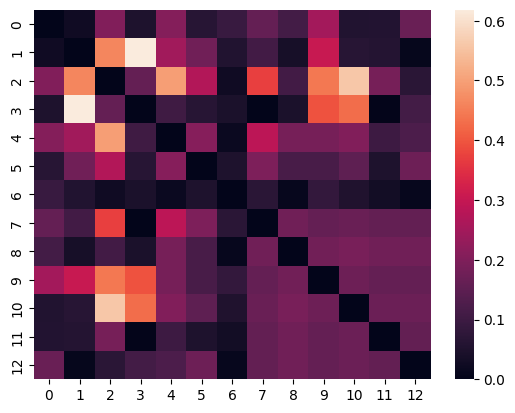

In [16]:
# Convertir columnas booleanas a enteros para la matriz de correlación
df_corr = df.copy()
for col in df_corr.select_dtypes(include='bool').columns:
	df_corr[col] = df_corr[col].astype(int)

# Obtener valor absoluto de matriz de correlación
cor = abs(np.corrcoef(df_corr, rowvar=False))
# Llenar la diagonal con ceros
np.fill_diagonal(cor, 0)

# Obtener los índices (i,j) de la posición del valor máximo
i, j = np.unravel_index(cor.argmax(), cor.shape)

# Imprimir los índices
print(i, j)
# Imprimir el valor de la correlación máxima
print(cor[i, j])

# Importar función heatmap de la librería seaborn
from seaborn import heatmap
# Graficar heatmap
heatmap(cor)

A partir de los resultados de la celda previa, ahora sabemos que la mayor correlación se tiene con las variables 1 y 3 (recordando que Python maneja el índice 0); es decir, las variables `Estatura` y `Male`. Dichas variables tienen una correlación de casi 0.62. En este caso, probablemente sea lo mejor no eliminar alguna de las variables, pues la correlación no es tan alta.

Esta información también se aprecia en el *heatmap*, pues tanto las posiciones (1,3) como (3,1) son las más iluminadas. Allí se aprecia que otra correlación muy alta sucede en la posición (2,10), pero con una magnitud más baja que la correlación máxima.

Con esto hemos terminado el proceso de corrección de colinealidad; en este caso no tuvimos que realizar ninguna acción, pues nuestros datos parecen no sufrir dicho problema. Ahora es momento de trabajar con el último de los 4 problemas, las interacciones. Pero, antes de empezar a resolver ese problema, necesitamos dividir nuestros datos en X e Y, pues no queremos generar interacciones con nuestra variable de salida, solo con las variables de entrada.

Ya que realizaremos dicha separación, vale la pena aprovechar y de una vez realizar la separación de los datos en entrenamiento y prueba. Seguiremos la misma metodología que hemos manejado previamente, usando la función `train_test_split` de sklearn.model_selection, para generar `X_train`, `X_test`, `Y_train`, y `Y_test`, definiendo la separación entrenamiento/prueba con una proporción 0.8/0.2. Al final, imprimiremos en consola las dimensiones de cada uno de los nuevos objetos, para asegurarnos de que todo está bien.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from sklearn.model_selection import train_test_split<br>
    X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Peso",axis=1),df.Peso,train_size = 0.8)<br>
    print(X_train.shape)<br>
    print(X_test.shape)<br>
    print(Y_train.shape)<br>
    print(Y_test.shape)
</details>

In [ ]:
# Importar función

# Generar subconjuntos de prueba y entrenamiento para X e Y

# Imprimir tamaño de nuevos objetos





A partir de este punto, podemos trabajar las interacciones. Una manera sencilla es usando la función `PolynomialFeatures` de la librería sklearn.preprocessing, que además de generar términos polinomiales, de los que estaremos hablando en el siguiente módulo, también genera términos de interacción. Trabajemos por el momento solo para X_train.

En la siguiente celda usaremos primero dicha función para definir el tipo de transformación que nos interesa, definiendo los parámetros `interaction_only=True` y `include_bias=False`, además de que incluiremos en la misma línea de código la función `fit` para `X_train`. Después, usaremos la función `transform` para generar la nueva base de datos, que contendrá tanto las variables originales como las variables de interacción. Dicha función entrega un arreglo de numpy, pero para conservar los nombres de las columnas, transformaremos la salida de la función a un data frame de pandas con la función `DataFrame`, incluyendo como parámetro los nombres de las variables, que se obtendrán con el atributo `get_feature_names`, con el resultado de `columns` como parámetro.

Finalmente, imprimiremos las primeras 5 observaciones del nuevo data frame para revisar que todo esté en orden.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    from sklearn.preprocessing import PolynomialFeatures<br>
    poly=PolynomialFeatures(interaction_only=True,include_bias=False).fit(X_train)<br>
    X_train_I=pd.DataFrame(poly.transform(df),columns=poly.get_feature_names(X_train.columns))<br>
    print(X_train_I.head())
</details>

In [ ]:
# Importar la función PolynomialFeatures

# Generar y hacer fit a dicha función

# Generar el nuevo data frame, en formato de pandas y con nombres de columnas

# Imprimir primeras 5 observaciones


Como pueden ver, nuestro nuevo data frame tiene ahora 78 columnas: las 12 variables de entrada riginales, más todas las variables de interacción (1 con 2, 1 con 3, 1 con 4, ..., 1 con 12, 2 con 3, 2 con 4, ..., 2 con 12, etc.). Sin embargo, es muy poco común generar interacciones con variables *dummy* que surgieron de variables categóricas, pues todas las observaciones tendrán valor 0. Revisemos eso imprimiendo el conteo de valores de la última columna del nuevo data frame, la variable de interacción entre `NivelDeObesidad_Overweight_Level_I` y `NivelDeObesidad_Overweight_Level_II`.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    print(X_train_I.iloc[:,77].value_counts())
</details>

In [ ]:
# Imprimir conteo de valores de columna 77 (variable #78)


Como ves, dicha variables contiene 1688 valores, todos igual a 0. Por lo mismo, realmente no tiene sentido generar interacciones para todas las variables de nuestra base de datos. En esta ocasión, específicamente nos interesará generar interacciones entre `Edad` y `Estatura` y entre `Estatura` y `Male`. Podemos generarlas manualmente sin mayor problema, pues simplemente necesitamos multiplicar ambas variables.

En la siguiente celda concatenaremos los resultados de dichas multiplicaciones en el data frame usando la función `insert`. Dicha función tendrá como parámetros la posición donde queremos incluir la nueva columna, el nombre que deseamos se le de a dicha columna, y el valor de la misma. Realizaremos dicho proceso tanto para X_train como para X_test, pues ambos subconjuntos de datos necesitan contener las mismas variables. Al final imprimiremos las primeras 5 observaciones de cada data frame para comprobar que los resultados sean adecuados.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    X_train.insert(2,"Edad Estatura",X_train.Edad*X_train.Estatura)<br>
    X_test.insert(2,"Edad Estatura",X_test.Edad*X_test.Estatura)<br>
    X_train.insert(4,"Male Estatura",X_train.Male*X_train.Estatura)<br>
    X_test.insert(4,"Male Estatura",X_test.Male*X_test.Estatura)<br>
    X_train.head()<br>
    X_test.head()
</details>

In [ ]:
# Concatenar Edad * Estatura en el índice 2 (posición 3) para X_train

# Concatenar Edad * Estatura en el índice 2 (posición 3) para X_test

# Concatenar Male * Estatura en el índice 4 (posición 5) para X_train

# Concatenar Edad * Estatura en el índice 4 (posición 5) para X_test

# Imprimir primeras 5 observaciones de X_train

# Imprimir primeras 5 observaciones de X_test


Como puedes observar, ahora nuestros subconjuntos de datos incluyen solamente las dos interacciones que nos interesa analizar. De hecho, podemos de forma muy sencilla corroborar que el proceso manual que realizamos es el mismo que se generó cuando generamos interacciones para todas las variables del sistema.

En la siguiente celda imprimiremos la suma de observaciones con valores distintos entre X_train (el data frame con el que seguiremos trabajando) y X_train_I (el data frame donde almacenamos todas las interacciones posibles del sistema). Para lograrlo, usaremos el operador `!=` que indica diferencia, la función `sum` para sumar todas las instancias, y la función `to_numpy()` para convertir la columna de nuestro data frame en un arreglo de numpy con el que se pueden hacer comparaciones de forma sencilla.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    print(sum(X_train_I["Edad Estatura"].to_numpy()!=X_train["Edad Estatura"].to_numpy()))<br>
    print(sum(X_train_I["Estatura Male"].to_numpy()!=X_train["Male Estatura"].to_numpy()))
</details>

In [ ]:
# Imprimir cantidad de valores distintos para "Edad Estatura"

# Imprimir cantidad de valores distintos para "Male Estatura" (se llama "Estatura Male" en X_train_I)


Hemos demostrado que las variables de interacción que generamos manualmente son iguales a las generadas por la función `PolyFeatures`. Hemos resuelto los 4 problemas, es momento de generar nuestro modelo de regresión lineal múltiple. En la siguiente celda usaremos la función `OLS` de la librería statsmodels.api para logralo, entrenando al modelo con la función `fit` usando solamente los datos de entrenamiento. Al final, imprimiremos un resumen de los resultados con el atributo `summary()`.<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    import statsmodels.api as sm<br>
    model = sm.OLS(Y_train,sm.add_constant(X_train))<br>
    results = model.fit()<br>
    print(results.summary())
</details>

In [ ]:
# Importar la librería

# Generar el modelo

# Entrenar el modelo

# Imprimir resultados del modelo


De los resultados previos hay varias cosas que destacar:
 - Se tiene una R cuadrada ajustada de 0.963 (o similar, dependiendo de la separación de datos), un valor muy alto.
 - Ambas variables de interacción tienen un *p-value* menos a 0.05; fue una buena idea incluirlas
 - La variable `ComeMuchasCalorias_yes` tiene un *p-value* mayor a 0.05, por lo que no podemos asegurar que exista una asociación entre el peso y si una persona considera que consume alimentos con alto contenido calórico; un resultado un tanto sorpresivo, al menos para mí.
 - La variable `Fumador_yes` tampoco tiene un *p-value* significativo, por lo que no podemos confirmar una asociación entre el peso y si la persona fuma.

Para terminar este ejercicio, revisemo qué tan bueno es el modelo para predecir el peso en observaciones que no se usaron para entrenarlo, usando los datos de X_test. Podríamos calcular tanto la R cuadrada ajustada como el RSE en los datos de prueba. Pero, en esta ocasión, usemos un método cualitativo para apreciar la calidad del modelo, graficando el verdadero peso de las observaciones de prueba contra el peso predecido por el modelo.

En la siguiente celda, primero calcularemos el peso estimado de los datos de prueba usando la función `predict`. Después usaremos la función `scatter` de la librería matplotlib.pyplot para generar una gráfica de dispersión, usando como parámetros el peso real y el peso estimado. Finalmente, incluiremos una línea recta con pendiente de 1, que nos servirá para visualizar lo que sería un modelo perfecto, aquel que predice el valor real para cada obvservación. Para lograrlo, usaremos la función `plot`, indicando las coordenadas [30,180] tanto para el eje "x" como para el eje "y".<br><br>

<details>
    <summary>Si tienes problemas, da un click aquí para mostrar la solución</summary>
    yHat=results.predict(sm.add_constant(X_test))<br>
    import matplotlib.pyplot as plt<br>
    plt.scatter(Y_test,yHat)<br>
    plt.plot([30,180],[30,180],color="red")
</details>

In [ ]:
# Predecir peso de observaciones de prueba

# Importar librería

# Generar gráfica de dispersión

# Agregar línea roja de referencia


En la gráfica se puede observar que el modelo es muy preciso, sobre todo para pesos inferiores a los 140 kilogramos. La diferencia entre el peso predecido y el peso real no parece ser mayor a un par de kilogramos para la mayoría de las observaciones.

Con esto hemos terminado la lectura interactiva de este módulo. Es momento de poner en práctica lo aprendido resolviendo la actividad de aprendizaje.